In [2]:
# Film Dialogue Sentiment Analysis with Dual Models
# This notebook analyzes sentiment in film dialogue from two text files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
import nltk
from nltk.tokenize import sent_tokenize
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
nltk.download('punkt', quiet=True)

print("Loading sentiment analysis models...")
print("This may take a few minutes on first run...")

# Load both sentiment models
siebert_model = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")
cardiff_model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

print("Models loaded successfully!\n")

# =============================================================================
# STEP 1: Load and Sentencize Text Files
# =============================================================================

def load_and_sentencize(filepath):
    """Load text file and split into sentences"""
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()
    
    sentences = sent_tokenize(text)
    # Remove empty sentences and strip whitespace
    sentences = [s.strip() for s in sentences if s.strip()]
    
    return sentences

print("Loading and sentencizing dialogue files...")
easian_sentences = load_and_sentencize('E&SE_Asian_dialogue.txt')
other_sentences = load_and_sentencize('All_other_dialogue.txt')

print(f"E&SE Asian dialogue: {len(easian_sentences)} sentences")
print(f"All other dialogue: {len(other_sentences)} sentences\n")


Loading sentiment analysis models...
This may take a few minutes on first run...


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Models loaded successfully!

Loading and sentencizing dialogue files...
E&SE Asian dialogue: 827 sentences
All other dialogue: 56297 sentences



In [6]:

# =============================================================================
# STEP 2: Compute Sentiment Scores
# =============================================================================

def get_siebert_score(text):
    """Get sentiment score from Siebert model (-1 to 1)"""
    try:
        result = siebert_model(text[:512])[0]  # Truncate to max length
        score = result['score'] if result['label'] == 'POSITIVE' else -result['score']
        return score
    except:
        return 0.0

def get_cardiff_score(text):
    """Get sentiment score from Cardiff model (-1 to 1)"""
    try:
        result = cardiff_model(text[:512])[0]  # Truncate to max length
        label = result['label']
        score = result['score']
        
        # Convert to continuous scale
        if label == 'positive':
            return score
        elif label == 'negative':
            return -score
        else:  # neutral
            return 0.0
    except:
        return 0.0

def analyze_sentences(sentences, file_label):
    """Analyze all sentences and return DataFrame"""
    print(f"Analyzing {file_label}...")
    
    data = []
    for i, sentence in enumerate(sentences):
        if (i + 1) % 100 == 0:
            print(f"  Processing sentence {i+1}/{len(sentences)}")
        
        siebert_score = get_siebert_score(sentence)
        cardiff_score = get_cardiff_score(sentence)
        
        data.append({
            'sentence': sentence,
            'siebert_sentiment': siebert_score,
            'cardiff_sentiment': cardiff_score,
            'source': file_label
        })
    
    return pd.DataFrame(data)

# Analyze both files
df_easian = analyze_sentences(easian_sentences, 'E&SE_Asian')
df_other = analyze_sentences(other_sentences, 'All_Other')

print("\nAnalysis complete!\n")

# =============================================================================
# STEP 3: Save CSV Files
# =============================================================================

print("Saving CSV files...")
df_easian.to_csv('E&SE_Asian_sentiment_scores.csv', index=False)
df_other.to_csv('All_other_sentiment_scores.csv', index=False)
print("CSV files saved successfully!\n")


Analyzing E&SE_Asian...
  Processing sentence 100/827
  Processing sentence 200/827
  Processing sentence 300/827
  Processing sentence 400/827
  Processing sentence 500/827
  Processing sentence 600/827
  Processing sentence 700/827
  Processing sentence 800/827
Analyzing All_Other...
  Processing sentence 100/56297
  Processing sentence 200/56297
  Processing sentence 300/56297
  Processing sentence 400/56297
  Processing sentence 500/56297
  Processing sentence 600/56297
  Processing sentence 700/56297
  Processing sentence 800/56297
  Processing sentence 900/56297
  Processing sentence 1000/56297
  Processing sentence 1100/56297
  Processing sentence 1200/56297
  Processing sentence 1300/56297
  Processing sentence 1400/56297
  Processing sentence 1500/56297
  Processing sentence 1600/56297
  Processing sentence 1700/56297
  Processing sentence 1800/56297
  Processing sentence 1900/56297
  Processing sentence 2000/56297
  Processing sentence 2100/56297
  Processing sentence 2200/56

  Processing sentence 23700/56297
  Processing sentence 23800/56297
  Processing sentence 23900/56297
  Processing sentence 24000/56297
  Processing sentence 24100/56297
  Processing sentence 24200/56297
  Processing sentence 24300/56297
  Processing sentence 24400/56297
  Processing sentence 24500/56297
  Processing sentence 24600/56297
  Processing sentence 24700/56297
  Processing sentence 24800/56297
  Processing sentence 24900/56297
  Processing sentence 25000/56297
  Processing sentence 25100/56297
  Processing sentence 25200/56297
  Processing sentence 25300/56297
  Processing sentence 25400/56297
  Processing sentence 25500/56297
  Processing sentence 25600/56297
  Processing sentence 25700/56297
  Processing sentence 25800/56297
  Processing sentence 25900/56297
  Processing sentence 26000/56297
  Processing sentence 26100/56297
  Processing sentence 26200/56297
  Processing sentence 26300/56297
  Processing sentence 26400/56297
  Processing sentence 26500/56297
  Processing s

  Processing sentence 47800/56297
  Processing sentence 47900/56297
  Processing sentence 48000/56297
  Processing sentence 48100/56297
  Processing sentence 48200/56297
  Processing sentence 48300/56297
  Processing sentence 48400/56297
  Processing sentence 48500/56297
  Processing sentence 48600/56297
  Processing sentence 48700/56297
  Processing sentence 48800/56297
  Processing sentence 48900/56297
  Processing sentence 49000/56297
  Processing sentence 49100/56297
  Processing sentence 49200/56297
  Processing sentence 49300/56297
  Processing sentence 49400/56297
  Processing sentence 49500/56297
  Processing sentence 49600/56297
  Processing sentence 49700/56297
  Processing sentence 49800/56297
  Processing sentence 49900/56297
  Processing sentence 50000/56297
  Processing sentence 50100/56297
  Processing sentence 50200/56297
  Processing sentence 50300/56297
  Processing sentence 50400/56297
  Processing sentence 50500/56297
  Processing sentence 50600/56297
  Processing s

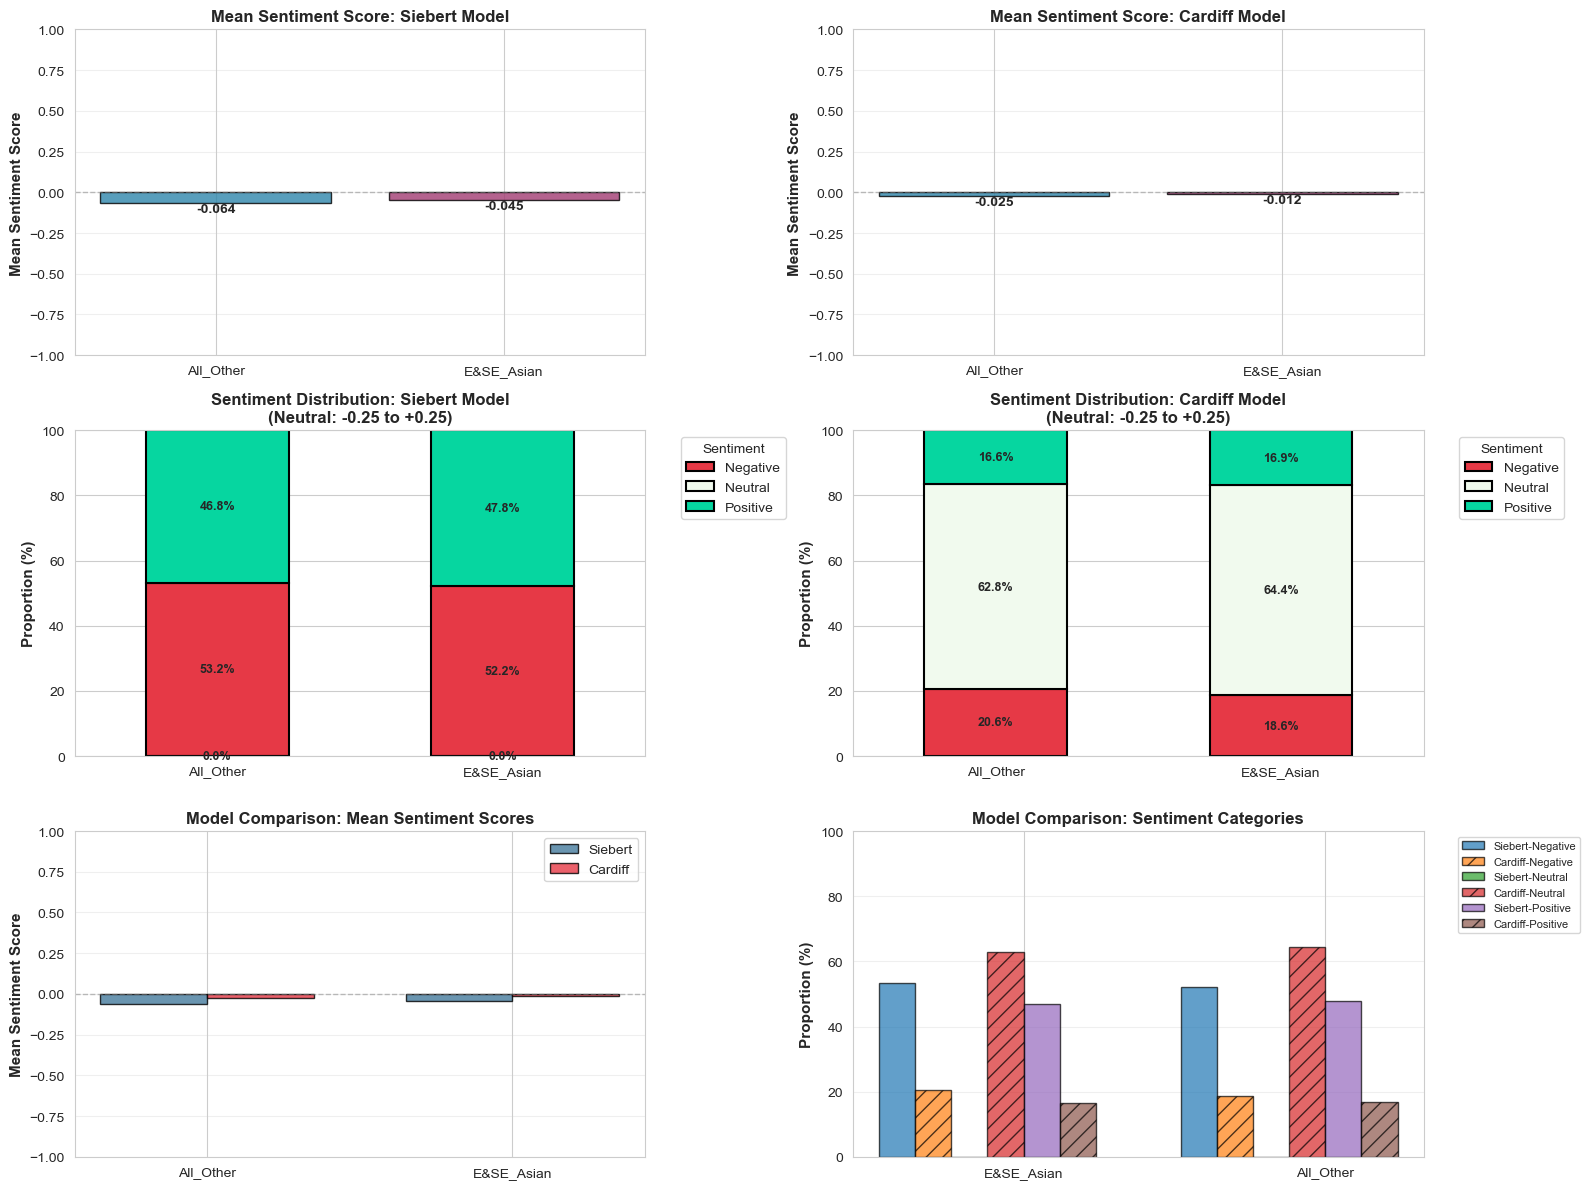

Visualization saved as 'sentiment_analysis_combined.png'

SUMMARY STATISTICS

File Sizes:
  E&SE Asian dialogue: 827 sentences
  All other dialogue: 56297 sentences

Model           Source               Mean       Std Dev   
----------------------------------------------------------------------
Siebert         E&SE_Asian             -0.045      0.991
Siebert         All_Other              -0.064      0.987
Cardiff         E&SE_Asian             -0.012      0.436
Cardiff         All_Other              -0.025      0.452

Sentiment Category Distributions (with ±0.25 neutral cutoff):
----------------------------------------------------------------------

Siebert Model:
siebert_category  Negative  Neutral  Positive
source                                       
All_Other            53.22        0     46.78
E&SE_Asian           52.24        0     47.76

Cardiff Model:
cardiff_category  Negative  Neutral  Positive
source                                       
All_Other            20.60    62.8

In [7]:

# =============================================================================
# STEP 4: Create Visualizations
# =============================================================================

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

# Combine dataframes for analysis
df_combined = pd.concat([df_easian, df_other], ignore_index=True)

# Define neutral cutoff
NEUTRAL_CUTOFF = 0.25

# Classify sentiments
def classify_sentiment(score, cutoff=NEUTRAL_CUTOFF):
    if score > cutoff:
        return 'Positive'
    elif score < -cutoff:
        return 'Negative'
    else:
        return 'Neutral'

df_combined['siebert_category'] = df_combined['siebert_sentiment'].apply(classify_sentiment)
df_combined['cardiff_category'] = df_combined['cardiff_sentiment'].apply(classify_sentiment)

# Create figure with subplots
fig = plt.figure(figsize=(16, 12))

# =============================================================================
# VISUALIZATION 1: Mean Sentiment Scores
# =============================================================================

# Calculate means for both models
means_siebert = df_combined.groupby('source')['siebert_sentiment'].mean()
means_cardiff = df_combined.groupby('source')['cardiff_sentiment'].mean()

# Plot 1: Mean sentiment - Siebert
ax1 = plt.subplot(3, 2, 1)
bars1 = ax1.bar(means_siebert.index, means_siebert.values, color=['#2E86AB', '#A23B72'], alpha=0.8, edgecolor='black')
ax1.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax1.set_ylabel('Mean Sentiment Score', fontsize=11, fontweight='bold')
ax1.set_title('Mean Sentiment Score: Siebert Model', fontsize=12, fontweight='bold')
ax1.set_ylim(-1, 1)
ax1.grid(axis='y', alpha=0.3)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=10, fontweight='bold')

# Plot 2: Mean sentiment - Cardiff
ax2 = plt.subplot(3, 2, 2)
bars2 = ax2.bar(means_cardiff.index, means_cardiff.values, color=['#2E86AB', '#A23B72'], alpha=0.8, edgecolor='black')
ax2.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax2.set_ylabel('Mean Sentiment Score', fontsize=11, fontweight='bold')
ax2.set_title('Mean Sentiment Score: Cardiff Model', fontsize=12, fontweight='bold')
ax2.set_ylim(-1, 1)
ax2.grid(axis='y', alpha=0.3)
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=10, fontweight='bold')

# =============================================================================
# VISUALIZATION 2: Proportion of Sentiment Categories (Normalized)
# =============================================================================

# Calculate proportions for Siebert
siebert_props = df_combined.groupby(['source', 'siebert_category']).size().unstack(fill_value=0)
siebert_props = siebert_props.div(siebert_props.sum(axis=1), axis=0) * 100

# Calculate proportions for Cardiff
cardiff_props = df_combined.groupby(['source', 'cardiff_category']).size().unstack(fill_value=0)
cardiff_props = cardiff_props.div(cardiff_props.sum(axis=1), axis=0) * 100

# Ensure all categories exist
for cat in ['Negative', 'Neutral', 'Positive']:
    if cat not in siebert_props.columns:
        siebert_props[cat] = 0
    if cat not in cardiff_props.columns:
        cardiff_props[cat] = 0

siebert_props = siebert_props[['Negative', 'Neutral', 'Positive']]
cardiff_props = cardiff_props[['Negative', 'Neutral', 'Positive']]

# Plot 3: Siebert proportions (stacked bar)
ax3 = plt.subplot(3, 2, 3)
siebert_props.plot(kind='bar', stacked=True, ax=ax3, 
                   color=['#E63946', '#F1FAEE', '#06D6A0'], 
                   edgecolor='black', linewidth=1.5)
ax3.set_ylabel('Proportion (%)', fontsize=11, fontweight='bold')
ax3.set_title('Sentiment Distribution: Siebert Model\n(Neutral: -0.25 to +0.25)', fontsize=12, fontweight='bold')
ax3.set_xlabel('')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.set_ylim(0, 100)

# Add percentage labels on bars
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9, fontweight='bold')

# Plot 4: Cardiff proportions (stacked bar)
ax4 = plt.subplot(3, 2, 4)
cardiff_props.plot(kind='bar', stacked=True, ax=ax4, 
                   color=['#E63946', '#F1FAEE', '#06D6A0'], 
                   edgecolor='black', linewidth=1.5)
ax4.set_ylabel('Proportion (%)', fontsize=11, fontweight='bold')
ax4.set_title('Sentiment Distribution: Cardiff Model\n(Neutral: -0.25 to +0.25)', fontsize=12, fontweight='bold')
ax4.set_xlabel('')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)
ax4.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.set_ylim(0, 100)

# Add percentage labels on bars
for container in ax4.containers:
    ax4.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9, fontweight='bold')

# =============================================================================
# Plot 5 & 6: Combined Model Comparison
# =============================================================================

# Plot 5: Side-by-side mean comparison
ax5 = plt.subplot(3, 2, 5)
x = np.arange(len(means_siebert.index))
width = 0.35

bars_s = ax5.bar(x - width/2, means_siebert.values, width, label='Siebert', 
                 color='#457B9D', alpha=0.8, edgecolor='black')
bars_c = ax5.bar(x + width/2, means_cardiff.values, width, label='Cardiff', 
                 color='#E63946', alpha=0.8, edgecolor='black')

ax5.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax5.set_ylabel('Mean Sentiment Score', fontsize=11, fontweight='bold')
ax5.set_title('Model Comparison: Mean Sentiment Scores', fontsize=12, fontweight='bold')
ax5.set_xticks(x)
ax5.set_xticklabels(means_siebert.index)
ax5.legend()
ax5.set_ylim(-1, 1)
ax5.grid(axis='y', alpha=0.3)

# Plot 6: Distribution comparison
ax6 = plt.subplot(3, 2, 6)
categories = ['Negative', 'Neutral', 'Positive']
x = np.arange(len(df_combined['source'].unique()))
width = 0.12

for i, cat in enumerate(categories):
    siebert_vals = siebert_props[cat].values
    cardiff_vals = cardiff_props[cat].values
    
    #offset = (i - 1) * width
    offset = (i - 1.5) * width * 2
    ax6.bar(x + offset - width/2, siebert_vals, width, 
            label=f'Siebert-{cat}', alpha=0.7, edgecolor='black')
    ax6.bar(x + offset + width/2, cardiff_vals, width, 
            label=f'Cardiff-{cat}', alpha=0.7, edgecolor='black', hatch='//')

ax6.set_ylabel('Proportion (%)', fontsize=11, fontweight='bold')
ax6.set_title('Model Comparison: Sentiment Categories', fontsize=12, fontweight='bold')
ax6.set_xticks(x)
ax6.set_xticklabels(df_combined['source'].unique())
ax6.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax6.set_ylim(0, 100)
ax6.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('sentiment_analysis_combined.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved as 'sentiment_analysis_combined.png'")

# =============================================================================
# Summary Statistics
# =============================================================================

print("\n" + "="*70)
print("SUMMARY STATISTICS")
print("="*70)

print(f"\nFile Sizes:")
print(f"  E&SE Asian dialogue: {len(easian_sentences)} sentences")
print(f"  All other dialogue: {len(other_sentences)} sentences")

print(f"\n{'Model':<15} {'Source':<20} {'Mean':<10} {'Std Dev':<10}")
print("-" * 70)
for model in ['siebert', 'cardiff']:
    col = f'{model}_sentiment'
    for source in df_combined['source'].unique():
        data = df_combined[df_combined['source'] == source][col]
        print(f"{model.capitalize():<15} {source:<20} {data.mean():>8.3f}   {data.std():>8.3f}")

print(f"\nSentiment Category Distributions (with ±{NEUTRAL_CUTOFF} neutral cutoff):")
print("-" * 70)
print("\nSiebert Model:")
print(siebert_props.round(2))
print("\nCardiff Model:")
print(cardiff_props.round(2))

print("\n" + "="*70)
print("Analysis complete! Check the CSV files for detailed sentence-level data.")
print("="*70)

NameError: name 'df_easian' is not defined